In [2]:
import pandas as pd
import numpy as np
import missingno
import pandas_profiling

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.ticker import MaxNLocator

from xgboost import XGBClassifier
from collections import namedtuple
from scipy import stats
from os import listdir
from os.path import isfile, join
from io import StringIO
from mlxtend.preprocessing import minmax_scaling

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier


# Main Data Preprocessing

In [3]:
def process_cp(ds1):
    
    for i in range(len(ds1.chest_pain_type)):
        ds1.chest_pain_type[i] += 1

In [4]:
def process_slope(ds1):
    
    for i in range(len(ds1.slope_peak_exercise)):
        ds1.slope_peak_exercise[i] += 1

In [5]:
def process_thal(ds1):
    
    for i in range(len(ds1.thal)):
        if ds1.thal[i] == 0:
            ds1.thal[i] = "?"
            
        if ds1.thal[i] == 1:
            ds1.thal[i] = 3
            
        if ds1.thal[i] == 2:
            ds1.thal[i] = 6
            
        if ds1.thal[i] == 3:
            ds1.thal[i] = 7

In [6]:
def process_hd(ds1):
    for i in range(len(ds1.heart_diagnosis)):
        if ds1.heart_diagnosis[i] != 0:
            ds1.heart_diagnosis[i] = 1

In [7]:
concatSets = []

def do_main_process(filename):
    
    print("\n Process Summary: ")
    print("{} dataset".format(filename))
    ds1 = pd.read_csv("datasets/{}".format(filename))
    len1 = len(ds1)
    
    ds1.drop_duplicates(inplace = True)
    print(len1 - len(ds1), " dublicates were dropped")
    print("New length: ", len(ds1))
    
    ds1.index = pd.RangeIndex(len(ds1.index))
    ds1.rename(columns={ds1.columns[0]: 'age',
                    ds1.columns[1]: 'sex', 
                    ds1.columns[2]: "chest_pain_type", 
                    ds1.columns[3]: "blood_pressure", 
                    ds1.columns[4]: "cholestoral", 
                    ds1.columns[5]: "blood_sugar",
                    ds1.columns[6]: "electrocardiographic_results", 
                    ds1.columns[7]: "maximum_heart_rate", 
                    ds1.columns[8]: "exercise_induced_angina", 
                    ds1.columns[9]: "st_depression", 
                    ds1.columns[10]: "slope_peak_exercise", 
                    ds1.columns[11]: "major_vessels_number", 
                    ds1.columns[12]: "thal", 
                    ds1.columns[13]: "heart_diagnosis"}, inplace=True)
    
    if sorted(list(ds1.chest_pain_type.unique())) == [0, 1, 2, 3]:
        print("Chest pain type column was rescaled")
        process_cp(ds1)
        
    if sorted(list(ds1.slope_peak_exercise.unique())) == [0, 1, 2] or sorted(list(ds1.slope_peak_exercise.unique())) == [0, 1]:
        print("Slope peak exercise column was rescaled")
        process_slope(ds1)
              
    if sorted(list(ds1.thal.unique())) == [0, 1, 2, 3] or sorted(list(ds1.thal.unique())) == [0, 1]:
        print("Thal column was rescaled")
        process_thal(ds1)
        
    if sorted(list(ds1.heart_diagnosis.unique())) == [0, 1, 2, 3, 4]:
        print("Heart diagnosis Column was rescaled")
        process_hd(ds1)
        
    concatSets.append(ds1)
    

In [8]:
def list_files(dirname):
    
    onlyfiles = [f for f in listdir(dirname) if isfile(join(dirname, f))]
    print("files to list: ",onlyfiles)
    for i in onlyfiles:
        df = do_main_process(i)
        print(df)

In [9]:
def find_blank(ds1):
    missList = []
    for i in range(len(ds1.columns)):
        col = ds1.columns[i]
        print("Percentage of blank cells")
        missPercent = len(ds1[ds1[col] == "?"]) / len(ds1) * 100
        print(col, ":  ", missPercent,"%" )
        if missPercent != 0:
            missList.append(col)
    return missList

In [10]:
def find_popularity(ds1, col):
    pop_dict = dict.fromkeys([1,0])
    for i in [1,0]:
        elsList = list(ds1[ds1["heart_diagnosis" ]==i][col])
        unique = set(elsList)
        if "?" in unique:
            unique.remove("?")
        mode = max(unique, key=elsList.count)
        pop_dict[i] = mode
    return pop_dict

In [11]:
def replace_by_mode(ds1, col):
    pop_dict = find_popularity(ds1, col)
    print(pop_dict)
    for j in range(len(ds1[col])):
            if ds1[col][j] == "?" and ds1["heart_diagnosis"][j] == 1:
                ds1[col][j] = pop_dict[1]
            elif ds1[col][j] == "?" and ds1["heart_diagnosis"][j] == 0:
                ds1[col][j] = pop_dict[0]

## Concat all datasets and remake them by one standart

In [16]:
list_files("datasets")

files to list:  ['data.csv', 'heart1.csv', 'heart2.csv', 'Heart_Disease_Data.csv', 'Heart_Disease_Prediction.csv', 'Heart_Disease_Prediction2.csv', 'processed_cleveland_data.csv', 'processed_hungarian_data.csv', 'processed_switzerland_data.csv', 'processed_va_data.csv', 'proc_heart_cleve_3_withheader.csv']

 Process Summary: 
data.csv dataset
1  dublicates were dropped
New length:  293
None

 Process Summary: 
heart1.csv dataset
723  dublicates were dropped
New length:  302
Chest pain type column was rescaled
Slope peak exercise column was rescaled
Thal column was rescaled


c:\users\bdarm\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\users\bdarm\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\bdarm\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

None

 Process Summary: 
heart2.csv dataset
1  dublicates were dropped
New length:  302
Chest pain type column was rescaled
Slope peak exercise column was rescaled
Thal column was rescaled
None

 Process Summary: 
Heart_Disease_Data.csv dataset
0  dublicates were dropped
New length:  303
Heart diagnosis Column was rescaled
None

 Process Summary: 
Heart_Disease_Prediction.csv dataset
0  dublicates were dropped
New length:  270
None

 Process Summary: 
Heart_Disease_Prediction2.csv dataset
0  dublicates were dropped
New length:  270
None

 Process Summary: 
processed_cleveland_data.csv dataset
0  dublicates were dropped
New length:  302
Heart diagnosis Column was rescaled
None

 Process Summary: 
processed_hungarian_data.csv dataset
1  dublicates were dropped
New length:  292
None

 Process Summary: 
processed_switzerland_data.csv dataset
0  dublicates were dropped
New length:  122
Heart diagnosis Column was rescaled
None

 Process Summary: 
processed_va_data.csv dataset
1  dublicates w

In [17]:
result = pd.concat(concatSets)
result.drop_duplicates(inplace = True)
result.index = pd.RangeIndex(len(result.index))
print(result.head())

   age  sex chest_pain_type blood_pressure cholestoral blood_sugar  \
0   28    1               2            130         132           0   
1   29    1               2            120         243           0   
2   29    1               2            140           ?           0   
3   30    0               1            170         237           0   
4   31    0               2            100         219           0   

  electrocardiographic_results maximum_heart_rate exercise_induced_angina  \
0                            2                185                       0   
1                            0                160                       0   
2                            0                170                       0   
3                            1                170                       0   
4                            1                150                       0   

  st_depression slope_peak_exercise major_vessels_number thal  heart_diagnosis  
0             0                   ?

## Short Exploratory Data Analysis

In [14]:
#after making this diagram, come back and recreate the "result" dataset and continue without entering this section
result = result.replace("?", np.nan)

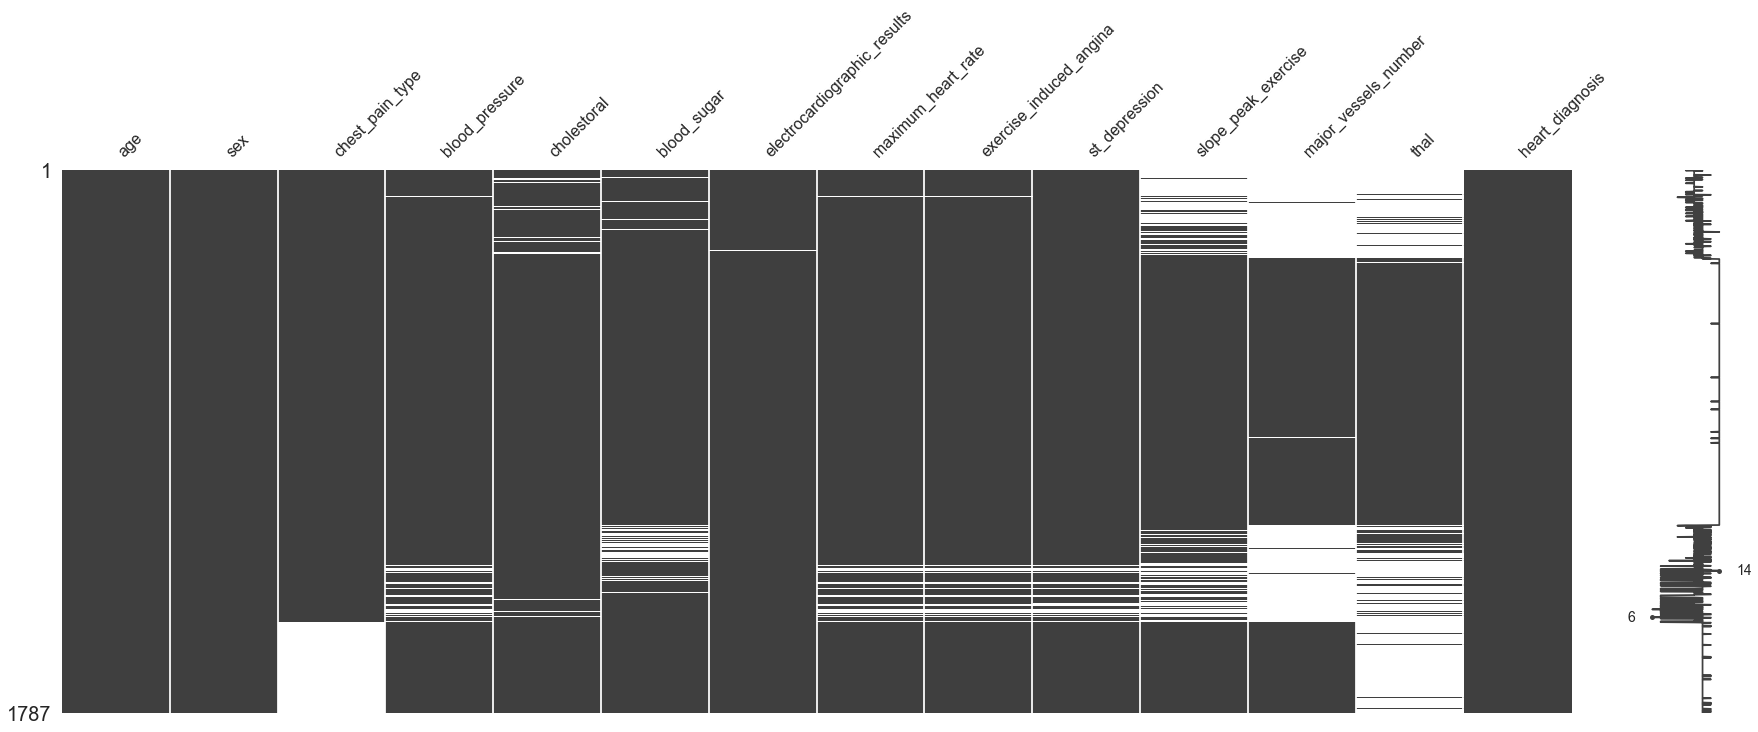

In [15]:
missingno.matrix(result, figsize = (30,10))

## Dealing with missing values

In [18]:
missListMean = ['blood_pressure', 'cholestoral', 'maximum_heart_rate', 'st_depression']
missList = find_blank(result)
print(missList)

Percentage of blank cells
age :   0.0 %
Percentage of blank cells
sex :   0.0 %
Percentage of blank cells
chest_pain_type :   16.73195299384443 %
Percentage of blank cells
blood_pressure :   3.301622831561276 %
Percentage of blank cells
cholestoral :   1.6228315612758812 %
Percentage of blank cells
blood_sugar :   4.98041410184667 %
Percentage of blank cells
electrocardiographic_results :   0.11191941801902631 %
Percentage of blank cells
maximum_heart_rate :   3.077783995523223 %
Percentage of blank cells
exercise_induced_angina :   3.077783995523223 %
Percentage of blank cells
st_depression :   3.469501958589815 %
Percentage of blank cells
slope_peak_exercise :   17.179630665920538 %
Percentage of blank cells
major_vessels_number :   33.967543368774486 %
Percentage of blank cells
thal :   42.80917739227756 %
Percentage of blank cells
heart_diagnosis :   0.0 %
['chest_pain_type', 'blood_pressure', 'cholestoral', 'blood_sugar', 'electrocardiographic_results', 'maximum_heart_rate', 'exer

c:\users\bdarm\appdata\local\programs\python\python36-32\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [19]:
for i in range(len(result.columns)):
    col = result.columns[i]
    for j in range(len(result[col])):
        if result[col][j] != "?":
            result[col][j] = float(result[col][j])
        else:
            result[col][j] = result[col][j].strip()

c:\users\bdarm\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\users\bdarm\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [20]:
for i in missList:
    print(i)
    if i in missListMean:
        counter = 0
        summ = 0
        print("mean")
        for k in range(len(result[i])):
            if result[i][k] != "?":
                summ +=result[i][k]
                counter += 1
        mean = summ / counter
        for j in range(len(result[i])):
            if result[i][j] == "?":
                result[i][j] = round(mean)
    else:
        print("pop")
        replace_by_mode(result, i)

chest_pain_type
pop
{1: 4.0, 0: 3.0}
blood_pressure
mean


c:\users\bdarm\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\bdarm\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\bdarm\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


cholestoral
mean
blood_sugar
pop
{1: 0.0, 0: 0.0}
electrocardiographic_results
pop
{1: 0.0, 0: 0.0}
maximum_heart_rate
mean
exercise_induced_angina
pop
{1: 0.0, 0: 0.0}
st_depression
mean
slope_peak_exercise
pop
{1: 2.0, 0: 2.0}
major_vessels_number
pop
{1: 0.0, 0: 0.0}
thal
pop
{1: 7.0, 0: 3.0}


In [21]:
find_blank(result)

Percentage of blank cells
age :   0.0 %
Percentage of blank cells
sex :   0.0 %
Percentage of blank cells
chest_pain_type :   0.0 %
Percentage of blank cells
blood_pressure :   0.0 %
Percentage of blank cells
cholestoral :   0.0 %
Percentage of blank cells
blood_sugar :   0.0 %
Percentage of blank cells
electrocardiographic_results :   0.0 %
Percentage of blank cells
maximum_heart_rate :   0.0 %
Percentage of blank cells
exercise_induced_angina :   0.0 %
Percentage of blank cells
st_depression :   0.0 %
Percentage of blank cells
slope_peak_exercise :   0.0 %
Percentage of blank cells
major_vessels_number :   0.0 %
Percentage of blank cells
thal :   0.0 %
Percentage of blank cells
heart_diagnosis :   0.0 %


[]

In [22]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(result)

      age  sex chest_pain_type blood_pressure cholestoral blood_sugar  \
0      28    1               2            130         132           0   
1      29    1               2            120         243           0   
2      29    1               2            140         223           0   
3      30    0               1            170         237           0   
4      31    0               2            100         219           0   
5      32    0               2            105         198           0   
6      32    1               2            110         225           0   
7      32    1               2            125         254           0   
8      33    1               3            120         298           0   
9      34    0               2            130         161           0   
10     34    1               2            150         214           0   
11     34    1               2             98         220           0   
12     35    0               1            120      

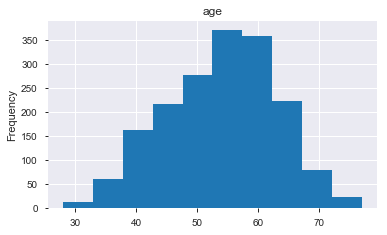

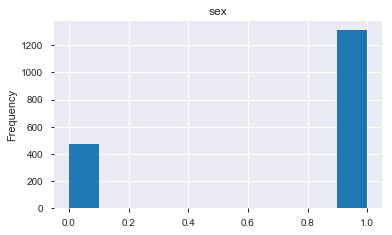

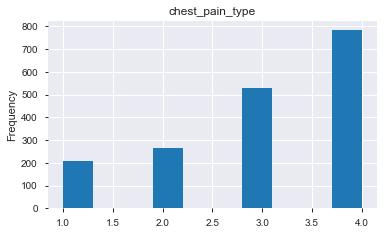

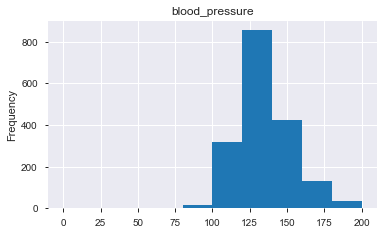

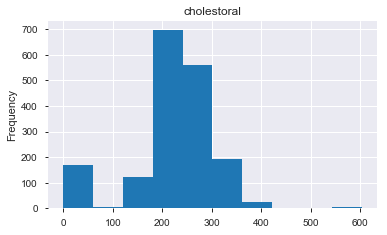

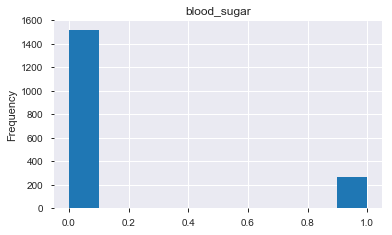

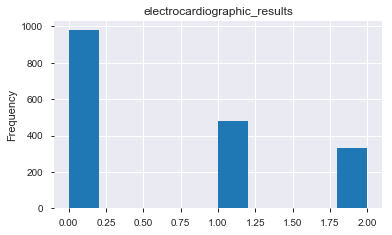

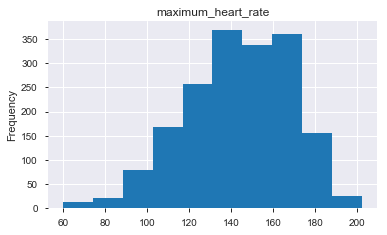

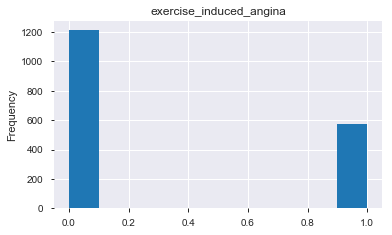

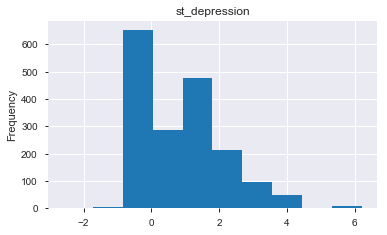

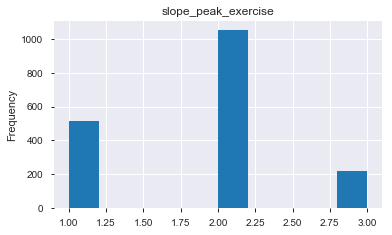

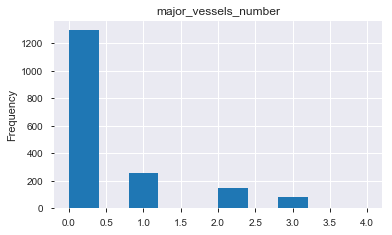

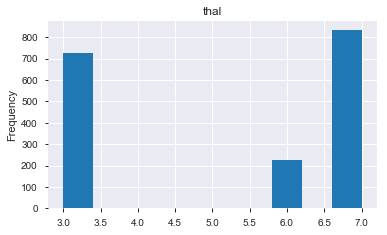

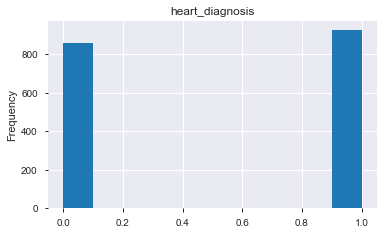

In [23]:
count = 0
for i in range(len(result.columns)):
    count += 1
    col = result.columns[i]
    f = plt.figure()
    f.set_figheight(20)
    f.set_figwidth(20)
    ax = f.add_subplot(5, 3, count)
    ax = result[col].plot.hist()
    ax.title.set_text(col)
    

In [24]:
Q1 = result.quantile(0.25)
Q3 = result.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age                14.0
sex                 1.0
heart_diagnosis     1.0
dtype: float64


In [25]:
outliers = (result < (Q1 - 1.5 * IQR)) |(result > (Q3 + 1.5 * IQR))
print (outliers)

        age  blood_pressure  blood_sugar  chest_pain_type  cholestoral  \
0     False           False        False            False        False   
1     False           False        False            False        False   
2     False           False        False            False        False   
3     False           False        False            False        False   
4     False           False        False            False        False   
...     ...             ...          ...              ...          ...   
1782  False           False        False            False        False   
1783  False           False        False            False        False   
1784  False           False        False            False        False   
1785  False           False        False            False        False   
1786  False           False        False            False        False   

      electrocardiographic_results  exercise_induced_angina  heart_diagnosis  \
0                            Fa

In [26]:
outliers.isin(['True']).any()

age                             False
blood_pressure                  False
blood_sugar                     False
chest_pain_type                 False
cholestoral                     False
electrocardiographic_results    False
exercise_induced_angina         False
heart_diagnosis                 False
major_vessels_number            False
maximum_heart_rate              False
sex                             False
slope_peak_exercise             False
st_depression                   False
thal                            False
dtype: bool

In [27]:
result.corr(method ='pearson')

,age,sex,heart_diagnosis
age,1.000000,-0.026351,0.175799
sex,-0.026351,1.000000,0.199629
heart_diagnosis,0.175799,0.199629,1.000000


[0.04890764 0.02618969 0.16231127 0.05366662 0.05685902 0.0123785
 0.044915   0.0532284  0.02414897 0.04991601 0.04396142 0.0519661
 0.37155136]


c:\users\bdarm\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


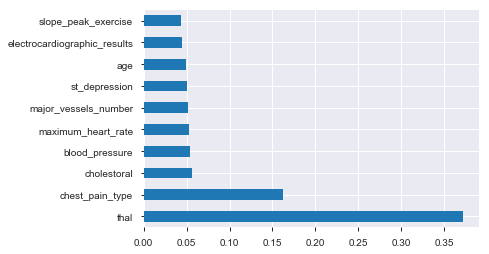

In [28]:
X = result.drop('heart_diagnosis', axis=1) 
y = result['heart_diagnosis']
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# Create normalized dataset

In [29]:
def normalize(ds1):
    for i in range(len(ds1.columns)):
        a = []
        df = pd.DataFrame()
        col = ds1.columns[i]
        a.append(col)
        df[col] = ds1[col]

        ds1[col] = minmax_scaling(df, columns=a)

In [30]:
normalized = result.copy()

In [31]:
normalize(normalized)

In [32]:
normalized

,age,sex,chest_pain_type,blood_pressure,cholestoral,blood_sugar,electrocardiographic_results,maximum_heart_rate,exercise_induced_angina,st_depression,slope_peak_exercise,major_vessels_number,thal,heart_diagnosis
0,0.000000,1.0,0.333333,0.65,0.218905,0.0,1.0,0.880282,0.0,0.295455,0.5,0.00,0.00,0.0
1,0.020408,1.0,0.333333,0.60,0.402985,0.0,0.0,0.704225,0.0,0.295455,0.5,0.00,0.00,0.0
2,0.020408,1.0,0.333333,0.70,0.369818,0.0,0.0,0.774648,0.0,0.295455,0.5,0.00,0.00,0.0
3,0.040816,0.0,0.000000,0.85,0.393035,0.0,0.5,0.774648,0.0,0.295455,0.5,0.00,0.75,0.0
4,0.061224,0.0,0.333333,0.50,0.363184,0.0,0.5,0.633803,0.0,0.295455,0.5,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1782,0.591837,0.0,1.000000,0.70,0.399668,0.0,0.0,0.443662,0.0,0.318182,0.0,0.00,1.00,1.0
1783,0.346939,1.0,1.000000,0.55,0.437811,0.0,0.0,0.507042,0.0,0.431818,0.0,0.00,1.00,1.0
1784,0.816327,1.0,1.000000,0.72,0.320066,1.0,0.0,0.570423,0.0,0.681818,0.0,0.50,1.00,1.0
1785,0.591837,1.0,1.000000,0.65,0.217247,0.0,0.0,0.387324,0.0,0.431818,0.0,0.25,1.00,1.0


In [33]:
X = normalized.drop('heart_diagnosis', axis=1)
y = normalized['heart_diagnosis']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# RANK Transformation

In [35]:
def rank_transform(ds1):
    for i in range(len(ds1.columns)-1):
        col = ds1.columns[i]
        ds1[col] =  ds1[col].rank()

In [36]:
rank = normalized.copy()

In [37]:
rank_transform(rank)

In [38]:
rank

,age,sex,chest_pain_type,blood_pressure,cholestoral,blood_sugar,electrocardiographic_results,maximum_heart_rate,exercise_induced_angina,st_depression,slope_peak_exercise,major_vessels_number,thal,heart_diagnosis
0,1.0,1130.5,341.0,872.5,184.0,760.5,1623.0,1746.0,608.0,336.5,1039.0,650.0,364.0,0.0
1,4.5,1130.5,341.0,457.0,1011.0,760.5,491.0,1270.5,608.0,336.5,1039.0,650.0,364.0,0.0
2,4.5,1130.5,341.0,1293.0,744.0,760.5,491.0,1515.0,608.0,336.5,1039.0,650.0,364.0,0.0
3,8.0,237.0,104.5,1722.5,948.0,760.5,1220.0,1515.0,608.0,336.5,1039.0,650.0,840.0,0.0
4,9.5,237.0,341.0,32.0,675.0,760.5,1220.0,1007.0,608.0,336.5,1039.0,650.0,364.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1782,1059.5,237.0,1395.0,1293.0,994.0,760.5,491.0,390.5,608.0,713.0,256.5,650.0,1370.0,1.0
1783,355.0,1130.5,1395.0,170.0,1251.0,760.5,491.0,570.0,608.0,1174.0,256.5,650.0,1370.0,1.0
1784,1694.0,1130.5,1395.0,1414.0,360.0,1654.0,491.0,730.0,608.0,1720.0,256.5,1629.5,1370.0,1.0
1785,1059.5,1130.5,1395.0,872.5,182.0,760.5,491.0,258.0,608.0,1174.0,256.5,1427.0,1370.0,1.0


In [39]:
Xr = rank.drop('heart_diagnosis', axis=1)
yr = rank['heart_diagnosis']

In [40]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=0.20)

# Prediction algoriths

## Descision Tree

In [41]:
def descision_tree(X_train, X_test, y_train, y_test):
    classifier = DecisionTreeClassifier()
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracyMatr = confusion_matrix(y_test, y_pred)
    print(accuracyMatr)
    print(classification_report(y_test, y_pred))
    print("Descision Tree Accuracy: ", 100 - 100 * (accuracyMatr[0][1] + accuracyMatr[1][0]) /
      (accuracyMatr[0][0]+accuracyMatr[0][1]+accuracyMatr[1][0]+accuracyMatr[1][1]), "%")

## KNN


In [42]:
def knn(X_train, X_test, y_train, y_test, k):
    X_train_KNN = X_train.iloc[:,:].values
    X_test_KNN = X_test.iloc[:,:].values
    y_train_KNN = y_train.iloc[:].values
    y_test_KNN = y_test.iloc[:].values
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train_KNN, y_train_KNN)
    y_pred_KNN = classifier.predict(X_test_KNN)
    accuracyMatr = confusion_matrix(y_test_KNN, y_pred_KNN)
    print(accuracyMatr)
    print(classification_report(y_test_KNN, y_pred_KNN))
    print("KNN Accuracy: ", 100 - 100 * (accuracyMatr[0][1] + accuracyMatr[1][0]) /
      (accuracyMatr[0][0]+accuracyMatr[0][1]+accuracyMatr[1][0]+accuracyMatr[1][1]), "%")

### algorithm for finding best k for knn

In [43]:
def find_best_k(X_train, X_test, y_test):
    error = []
    for i in range(1, 40):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        pred_i = knn.predict(X_test)
        error.append(np.mean(pred_i != y_test))

    plt.figure(figsize=(12, 6))
    plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
             markerfacecolor='blue', markersize=10)
    plt.title('Error Rate K Value')
    plt.xlabel('K Value')
    plt.ylabel('Mean Error')
    

## Gradient Boosting Classifier

In [44]:
def GB_classifier(X_train, X_test, y_train, y_test, lr):
        
    gb_clf2 = GradientBoostingClassifier(n_estimators = 20, learning_rate = lr, max_features = 2, max_depth = 2, 
                                         random_state = 0)
    gb_clf2.fit(X_train, y_train)
    predictions = gb_clf2.predict(X_test)

    accuracyMatr = confusion_matrix(y_test, predictions)
    print(accuracyMatr)
    print(classification_report(y_test, predictions))
    print("Gradient BoostAccuracy: ", 100 - 100 * (accuracyMatr[0][1] + accuracyMatr[1][0]) /
      (accuracyMatr[0][0]+accuracyMatr[0][1]+accuracyMatr[1][0]+accuracyMatr[1][1]), "%")

### Algorithm for finding best learning rate for Gradient boosting

In [45]:
def find_learning_rate(X_train, X_test, y_train, y_test):
    lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

    for learning_rate in lr_list:
        gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
        gb_clf.fit(X_train, y_train)

        print("Learning rate: ", learning_rate)
        print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
        print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

## XGBoost Classifier

In [46]:
def XGD_classifier(X_train, X_test, y_train, y_test):
    lbl = preprocessing.LabelEncoder()
    X_train['chest_pain_type'] = lbl.fit_transform(X_train['chest_pain_type'].astype(float))
    X_test['chest_pain_type'] = lbl.fit_transform(X_test['chest_pain_type'].astype(float))

    xgb_clf = XGBClassifier()
    xgb_clf.fit(X_train, y_train)
    score = xgb_clf.score(X_test, y_test)
    print("XGB Accuracy: ", score * 100, "%")

## ADA boost

### Decision tree Base Estimator

In [47]:
def ADAboost_DT(X_train, X_test, y_train, y_test):
    abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)
    model = abc.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("ADA DT Accuracy: ",metrics.accuracy_score(y_test, y_pred) * 100, "%")

### SVC Base Estimator

In [48]:
def ADAboost_SVC(X_train, X_test, y_train, y_test):
    svc=SVC(probability=True, kernel='linear')
    abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)
    model = abc.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("ADA SVC Accuracy: ",metrics.accuracy_score(y_test, y_pred)*100, "%")

## Linear Regression

In [49]:
def LinearRegr(X_train, X_test, y_train, y_test):
    regressor = LinearRegression()  
    regressor.fit(X_train, y_train) #training the algorithm
    print("Intercept: " + str(regressor.intercept_))
    print("Coefficients: " + str(regressor.coef_))
    y_pred = regressor.predict(X_test)
    from sklearn.metrics import accuracy_score
    df = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
    print(df)

    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

## Random Forest with LDA

In [50]:
def LDA(X_train, X_test, y_train, y_test):

    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train, y_train)
    print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
    print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))
    X_train = lda.fit_transform(X_train, y_train)
    X_test = lda.transform(X_test)
   
    classifier = RandomForestClassifier(max_depth=2, random_state=0)

    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print('LDA Accuracy: ', accuracy_score(y_test, y_pred) * 100, "%")

## Random Forest with PCA

In [51]:
def PCA_alg(X_train, X_test, y_train, y_test):
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    pca = PCA()
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    
    explained_variance = pca.explained_variance_ratio_
    print(explained_variance)
    pca = PCA(n_components = 13)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)

    classifier = RandomForestClassifier(max_depth=2, random_state=0)
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print('PCA Accuracy: ', accuracy_score(y_test, y_pred) * 100, '%')

## SVM

In [52]:
def SVM(X_train, X_test, y_train, y_test, ker):
    svclassifier = SVC(kernel= ker)
    svclassifier.fit(X_train, y_train)
    y_pred = svclassifier.predict(X_test)
    accuracyMatr = confusion_matrix(y_test, y_pred)
    print(accuracyMatr)
    print(classification_report(y_test, y_pred))
    print(ker, " kernel ", "Accuracy: ", 100 - 100 * (accuracyMatr[0][1] + accuracyMatr[1][0]) /
          (accuracyMatr[0][0]+accuracyMatr[0][1]+accuracyMatr[1][0]+accuracyMatr[1][1]), "%")
    

## Naive Bayes

In [53]:
def NB(X_train, X_test, y_train, y_test):
    model = MultinomialNB().fit(X_train, y_train)
    predicted = model.predict(X_test)
    print("Naive Bayes Accuracy: ", np.mean(predicted == y_test) * 100, "%")
    print(confusion_matrix(y_test, predicted))

## Neural Network MLPC

In [54]:
def MLPC(X_train, X_test, y_train, y_test):
    X_train_MLPC = X_train.iloc[:,:].values
    X_test_MLPC = X_test.iloc[:,:].values
    y_train_MLPC = y_train.iloc[:].values
    y_test_MLPC = y_test.iloc[:].values
    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train_MLPC = scaler.transform(X_train_MLPC)
    X_test_MLPC = scaler.transform(X_test_MLPC)
    mlp = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=1000)
    mlp.fit(X_train, y_train.values.ravel())
    predictions = mlp.predict(X_test)
    print(confusion_matrix(y_test,predictions))
    print(classification_report(y_test,predictions))

# All runs

## Normalized dataset

In [55]:
MLPC(X_train, X_test, y_train, y_test)

[[153  14]
 [ 26 165]]
              precision    recall  f1-score   support

         0.0       0.85      0.92      0.88       167
         1.0       0.92      0.86      0.89       191

    accuracy                           0.89       358
   macro avg       0.89      0.89      0.89       358
weighted avg       0.89      0.89      0.89       358



In [56]:
NB(X_train, X_test, y_train, y_test)

Naive Bayes Accuracy:  80.72625698324022 %
[[126  41]
 [ 28 163]]


In [57]:
SVM(X_train, X_test, y_train, y_test, "linear")

[[148  19]
 [ 39 152]]
              precision    recall  f1-score   support

         0.0       0.79      0.89      0.84       167
         1.0       0.89      0.80      0.84       191

    accuracy                           0.84       358
   macro avg       0.84      0.84      0.84       358
weighted avg       0.84      0.84      0.84       358

linear  kernel  Accuracy:  83.79888268156425 %


In [58]:
SVM(X_train, X_test, y_train, y_test, "rbf")

[[144  23]
 [ 31 160]]
              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84       167
         1.0       0.87      0.84      0.86       191

    accuracy                           0.85       358
   macro avg       0.85      0.85      0.85       358
weighted avg       0.85      0.85      0.85       358

rbf  kernel  Accuracy:  84.91620111731844 %


c:\users\bdarm\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [59]:
SVM(X_train, X_test, y_train, y_test, "sigmoid")

c:\users\bdarm\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[130  37]
 [ 33 158]]
              precision    recall  f1-score   support

         0.0       0.80      0.78      0.79       167
         1.0       0.81      0.83      0.82       191

    accuracy                           0.80       358
   macro avg       0.80      0.80      0.80       358
weighted avg       0.80      0.80      0.80       358

sigmoid  kernel  Accuracy:  80.44692737430168 %


In [60]:
PCA_alg(X_train, X_test, y_train, y_test)

[0.18429844 0.12482598 0.09380436 0.08100427 0.08058006 0.07282874
 0.07073759 0.06144871 0.05479942 0.05203837 0.04689575 0.03986946
 0.03686885]
[[136  31]
 [ 41 150]]
PCA Accuracy:  79.88826815642457 %


c:\users\bdarm\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [61]:
LDA(X_train, X_test, y_train, y_test)

Accuracy of LDA classifier on training set: 0.86
Accuracy of LDA classifier on test set: 0.83
[[144  23]
 [ 37 154]]
LDA Accuracy:  83.24022346368714 %


c:\users\bdarm\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [62]:
LinearRegr(X_train, X_test, y_train, y_test)

Intercept: -0.1303921310709938
Coefficients: [ 0.00627485 -0.04474177  0.49035603  0.05431478 -0.24519194 -0.04011421
  0.1027211  -0.07697738 -0.01743675 -0.04387581  0.19151315  0.04707658
  0.62403722]
     Actual  Predicted
0       1.0   0.931951
1       0.0   0.193058
2       1.0   0.508834
3       0.0   0.482152
4       0.0   0.068632
..      ...        ...
353     1.0   0.492507
354     0.0  -0.070881
355     0.0   0.020328
356     1.0   0.891047
357     1.0   0.564007

[358 rows x 2 columns]
Mean Absolute Error: 0.2517983927952096
Mean Squared Error: 0.1281859640427325
Root Mean Squared Error: 0.3580306747231758


In [63]:
ADAboost_SVC(X_train, X_test, y_train, y_test)

ADA SVC Accuracy:  72.06703910614524 %


In [64]:
ADAboost_DT(X_train, X_test, y_train, y_test)

ADA DT Accuracy:  84.07821229050279 %


In [65]:
XGD_classifier(X_train, X_test, y_train, y_test)

XGB Accuracy:  87.98882681564247 %


c:\users\bdarm\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\bdarm\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [66]:
find_learning_rate(X_train, X_test, y_train, y_test)

Learning rate:  0.05
Accuracy score (training): 0.834
Accuracy score (validation): 0.824
Learning rate:  0.075
Accuracy score (training): 0.838
Accuracy score (validation): 0.827
Learning rate:  0.1
Accuracy score (training): 0.836
Accuracy score (validation): 0.821
Learning rate:  0.25
Accuracy score (training): 0.867
Accuracy score (validation): 0.841
Learning rate:  0.5
Accuracy score (training): 0.880
Accuracy score (validation): 0.858
Learning rate:  0.75
Accuracy score (training): 0.883
Accuracy score (validation): 0.849
Learning rate:  1
Accuracy score (training): 0.894
Accuracy score (validation): 0.849


In [67]:
GB_classifier(X_train, X_test, y_train, y_test, 0.5)

[[144  23]
 [ 28 163]]
              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85       167
         1.0       0.88      0.85      0.86       191

    accuracy                           0.86       358
   macro avg       0.86      0.86      0.86       358
weighted avg       0.86      0.86      0.86       358

Gradient BoostAccuracy:  85.75418994413408 %


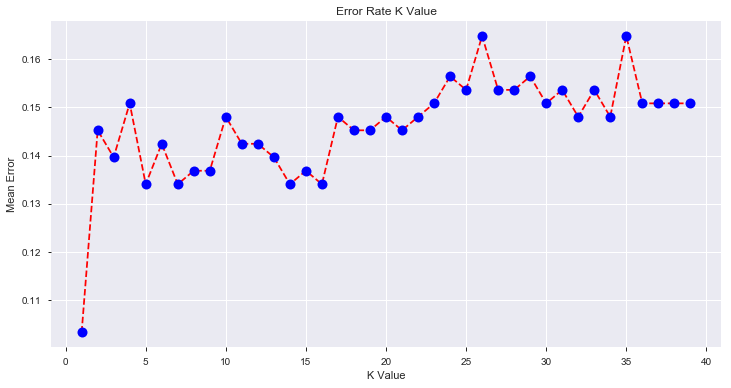

In [68]:
find_best_k(X_train, X_test, y_test)

In [69]:
knn(X_train, X_test, y_train, y_test, 1)

[[155  12]
 [ 25 166]]
              precision    recall  f1-score   support

         0.0       0.86      0.93      0.89       167
         1.0       0.93      0.87      0.90       191

    accuracy                           0.90       358
   macro avg       0.90      0.90      0.90       358
weighted avg       0.90      0.90      0.90       358

KNN Accuracy:  89.66480446927375 %


In [70]:
descision_tree(X_train, X_test, y_train, y_test)

[[149  18]
 [ 31 160]]
              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86       167
         1.0       0.90      0.84      0.87       191

    accuracy                           0.86       358
   macro avg       0.86      0.86      0.86       358
weighted avg       0.87      0.86      0.86       358

Descision Tree Accuracy:  86.31284916201118 %


## dataset after Rank transformation

In [71]:
MLPC(Xr_train, Xr_test, yr_train, yr_test)

[[150  14]
 [ 53 141]]
              precision    recall  f1-score   support

         0.0       0.74      0.91      0.82       164
         1.0       0.91      0.73      0.81       194

    accuracy                           0.81       358
   macro avg       0.82      0.82      0.81       358
weighted avg       0.83      0.81      0.81       358



In [72]:
NB(Xr_train, Xr_test, yr_train, yr_test)

Naive Bayes Accuracy:  73.46368715083798 %
[[117  47]
 [ 48 146]]


In [73]:
LDA(Xr_train, Xr_test, yr_train, yr_test)


Accuracy of LDA classifier on training set: 0.82
Accuracy of LDA classifier on test set: 0.81
[[110  54]
 [ 21 173]]
LDA Accuracy:  79.05027932960894 %


c:\users\bdarm\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [74]:
LinearRegr(Xr_train, Xr_test, yr_train, yr_test)


Intercept: -0.4110776718161835
Coefficients: [ 2.19167673e-05 -3.91979756e-05  3.45243753e-04 -1.48270347e-06
 -3.38190473e-05 -2.71540918e-05  7.91106411e-05 -1.99219791e-05
 -3.21248680e-05 -2.23971005e-05  1.84390807e-04  4.30309806e-05
  5.43820290e-04]
     Actual  Predicted
0       1.0   0.524148
1       1.0   0.320643
2       1.0   0.669501
3       1.0   1.003624
4       0.0   0.408946
..      ...        ...
353     0.0   0.416888
354     1.0   1.010453
355     1.0   0.778292
356     1.0   1.053986
357     0.0   0.159004

[358 rows x 2 columns]
Mean Absolute Error: 0.27713266635426487
Mean Squared Error: 0.13415720879537138
Root Mean Squared Error: 0.3662747722617153


In [ ]:
ADAboost_SVC(Xr_train, Xr_test, yr_train, yr_test)


In [ ]:
ADAboost_DT(Xr_train, Xr_test, yr_train, yr_test)


In [75]:
XGD_classifier(Xr_train, Xr_test, yr_train, yr_test)


c:\users\bdarm\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\bdarm\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


XGB Accuracy:  89.10614525139665 %


In [76]:
find_learning_rate(Xr_train, Xr_test, yr_train, yr_test)


Learning rate:  0.05
Accuracy score (training): 0.835
Accuracy score (validation): 0.807
Learning rate:  0.075
Accuracy score (training): 0.835
Accuracy score (validation): 0.810
Learning rate:  0.1
Accuracy score (training): 0.838
Accuracy score (validation): 0.818
Learning rate:  0.25
Accuracy score (training): 0.868
Accuracy score (validation): 0.846
Learning rate:  0.5
Accuracy score (training): 0.880
Accuracy score (validation): 0.844
Learning rate:  0.75
Accuracy score (training): 0.893
Accuracy score (validation): 0.872
Learning rate:  1
Accuracy score (training): 0.890
Accuracy score (validation): 0.860


In [77]:
GB_classifier(Xr_train, Xr_test, yr_train, yr_test, 0.5)


[[134  30]
 [ 26 168]]
              precision    recall  f1-score   support

         0.0       0.84      0.82      0.83       164
         1.0       0.85      0.87      0.86       194

    accuracy                           0.84       358
   macro avg       0.84      0.84      0.84       358
weighted avg       0.84      0.84      0.84       358

Gradient BoostAccuracy:  84.35754189944134 %


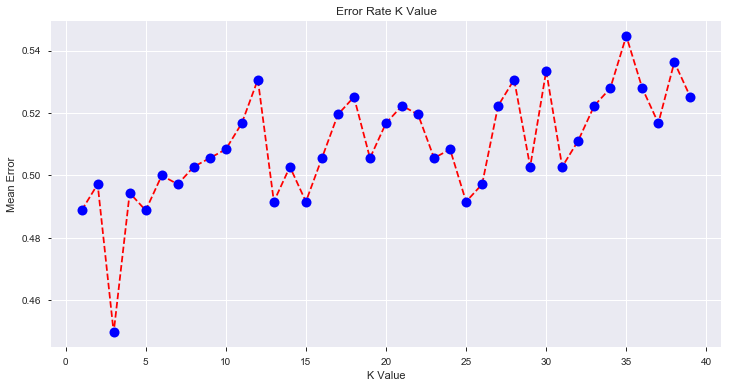

In [78]:
find_best_k(Xr_train, Xr_test, yr_test)


In [84]:
knn(Xr_train, Xr_test, yr_train, yr_test, 1)


[[127  37]
 [ 28 166]]
              precision    recall  f1-score   support

         0.0       0.82      0.77      0.80       164
         1.0       0.82      0.86      0.84       194

    accuracy                           0.82       358
   macro avg       0.82      0.82      0.82       358
weighted avg       0.82      0.82      0.82       358

KNN Accuracy:  81.84357541899442 %


In [80]:
descision_tree(Xr_train, Xr_test, yr_train, yr_test)

[[137  27]
 [ 24 170]]
              precision    recall  f1-score   support

         0.0       0.85      0.84      0.84       164
         1.0       0.86      0.88      0.87       194

    accuracy                           0.86       358
   macro avg       0.86      0.86      0.86       358
weighted avg       0.86      0.86      0.86       358

Descision Tree Accuracy:  85.75418994413408 %


In [81]:
PCA_alg(Xr_train, Xr_test, yr_train, yr_test)

[0.19323513 0.12130448 0.08968768 0.08305631 0.07945969 0.07319466
 0.06903309 0.06134316 0.0545911  0.05279873 0.0475081  0.03868793
 0.03609993]
[[101  63]
 [ 40 154]]
PCA Accuracy:  71.22905027932961 %


c:\users\bdarm\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
